In [89]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [90]:
file= pd.read_csv("insurance.csv")

In [91]:
file.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [92]:
file.head(8)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560


In [93]:
file.shape

(1338, 7)

In [94]:
#describe the data
file.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='region', ylabel='charges'>

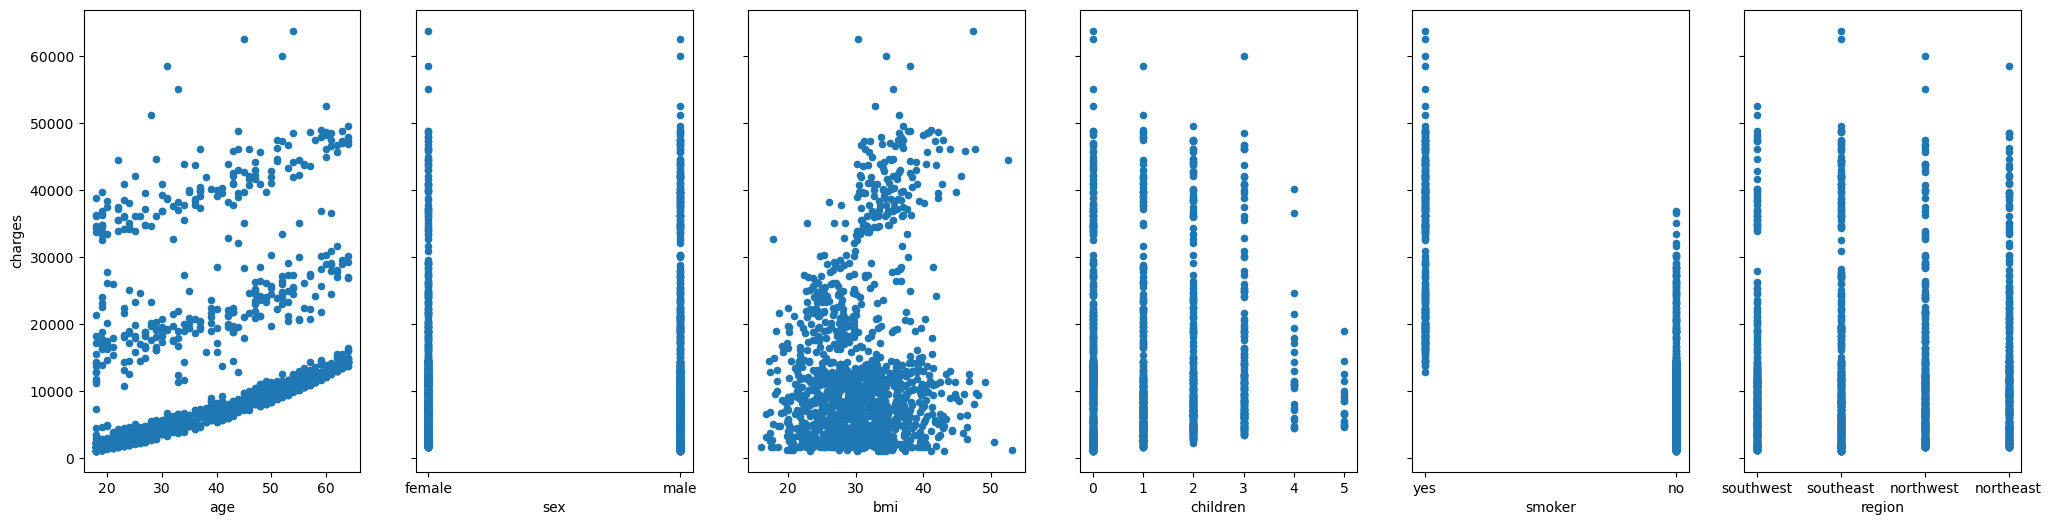

In [95]:
# visualize the relationship between the features and the response using Scatter Plot
fig,s = plt.subplots(1,6, sharey=True)
file.plot(kind='scatter', x ='age', y ='charges', ax=s[0],figsize=(25, 6))#Width,Heigh
file.plot(kind='scatter', x ='sex', y ='charges', ax=s[1])
file.plot(kind='scatter', x ='bmi', y ='charges', ax=s[2])
file.plot(kind='scatter', x ='children', y ='charges', ax=s[3])
file.plot(kind='scatter', x ='smoker', y ='charges', ax=s[4])
file.plot(kind='scatter', x ='region', y ='charges', ax=s[5])

In [96]:
#count the data
print(file.sex.value_counts())
print(file.region.value_counts())
print(file.bmi.value_counts())
print(file.children.value_counts())

male      676
female    662
Name: sex, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [97]:
#convert the string data into numberical
file['sex']=file['sex'].map({'male':1,'female':0})
file['smoker']=file['smoker'].map({'yes':1,'no':0})
file['region']=file['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

In [98]:
file.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


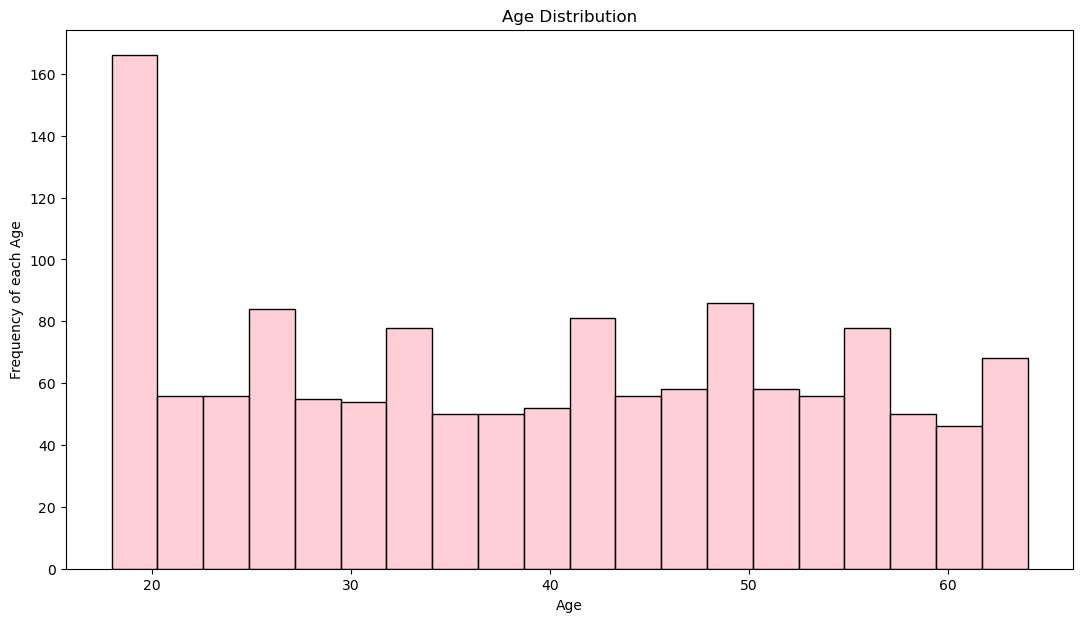

In [99]:
#Univariate Analysis
#exploratory data analysis
plt.figure(figsize=(13,7))
sns.histplot(file.age,bins=20,kde=False,color='pink')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency of each Age')
plt.show()


max peole having age below 20

Text(0.5, 1.0, 'Gender Distribution')

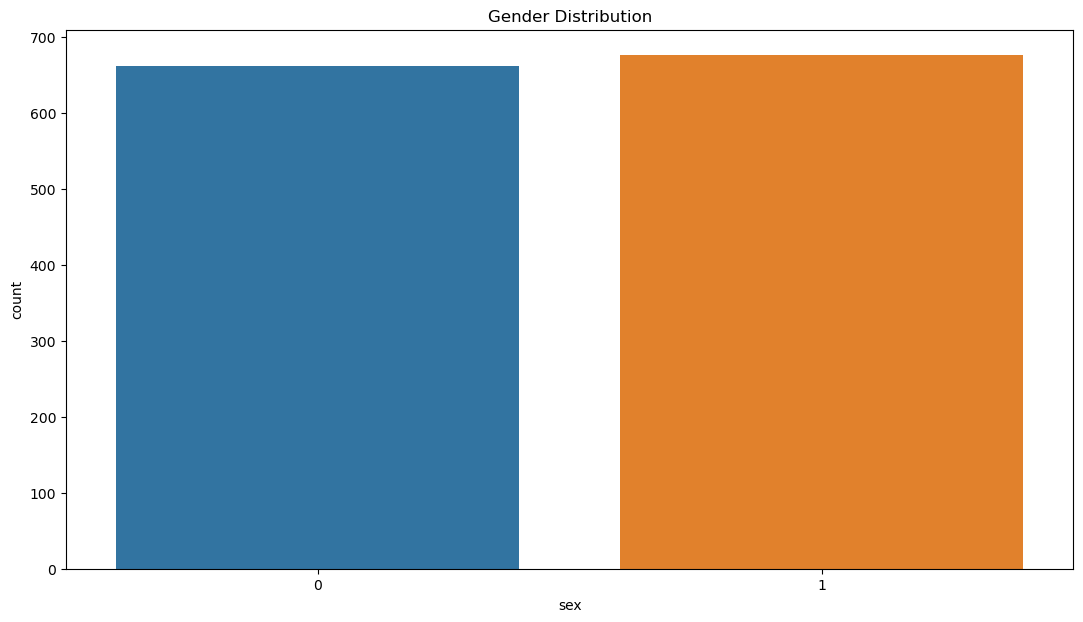

In [100]:
# Checking Sex Distribution
plt.figure(figsize=(13,7))                        
sns.countplot(x='sex',data=file)
plt.title('Gender Distribution')


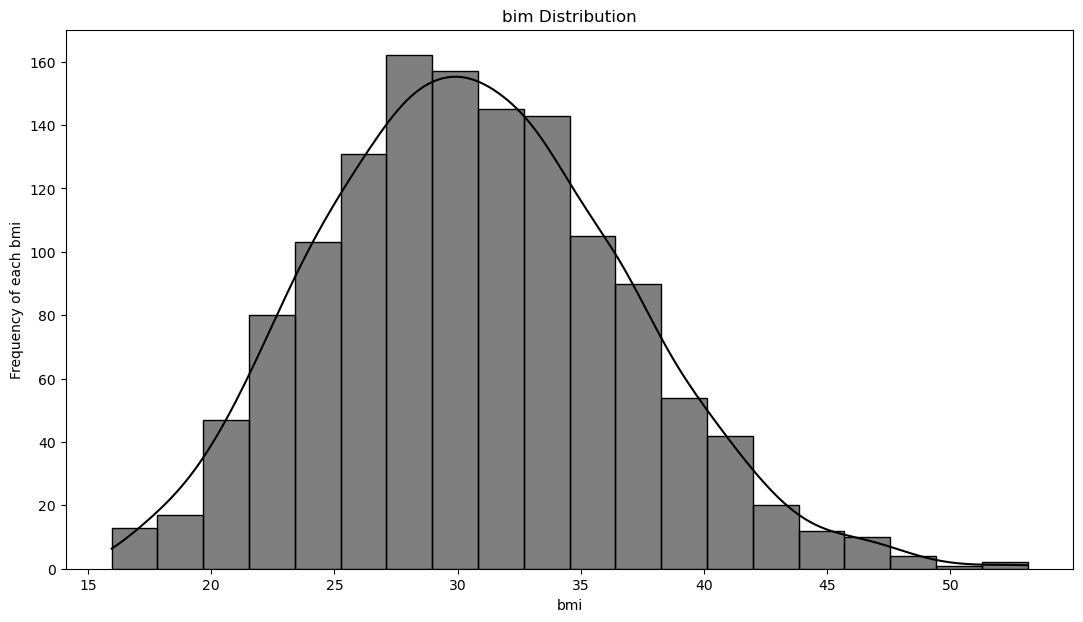

In [101]:
#Checking BMI Distribution
plt.figure(figsize=(13,7))
sns.histplot(file.bmi,bins=20,kde=True,color='black')
plt.title('bim Distribution')
plt.xlabel('bmi')
plt.ylabel('Frequency of each bmi')
plt.show()


#Majority of people have BMI between 25&40,which is considered as overweight and could be a major factor in increasing the medical cost

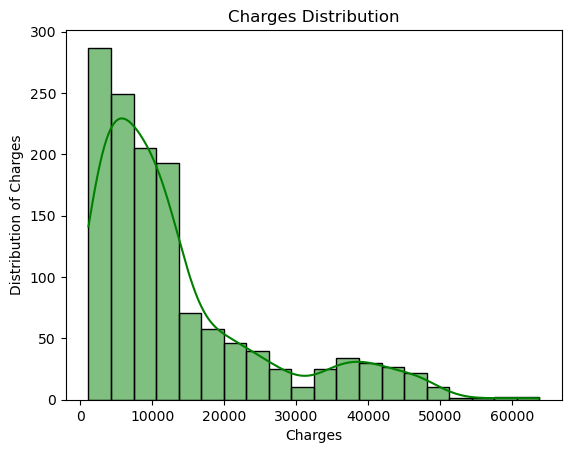

In [102]:
# Checking Charges Distribution
sns.histplot(file.charges, bins = 20, kde = True, color = 'green')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Distribution of Charges')
plt.show()

<Figure size 1300x700 with 0 Axes>

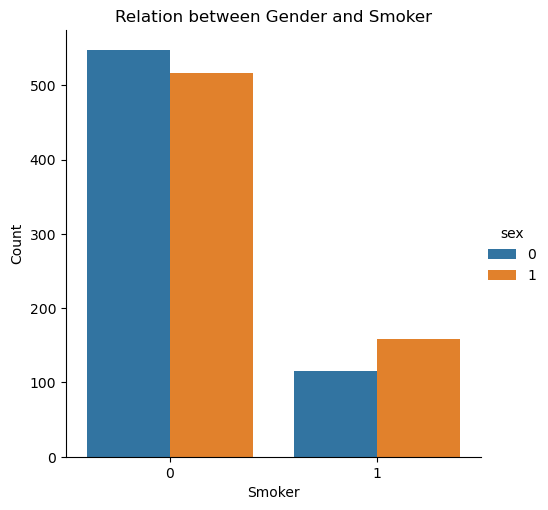

We can observe that male smokers are more in numbers,so, I will assume that medical treatment expense for male would be more than female


In [103]:
#Bi-variate Analysis
# Relation between Gender and Smoker
plt.figure(figsize=(13, 7))
sns.catplot(x = 'smoker', kind = 'count', hue = 'sex', data = file)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Relation between Gender and Smoker')
plt.show()
print("We can observe that male smokers are more in numbers,so, I will assume that medical treatment expense for male would be more than female")

Text(0.5, 1.0, 'region distrition')

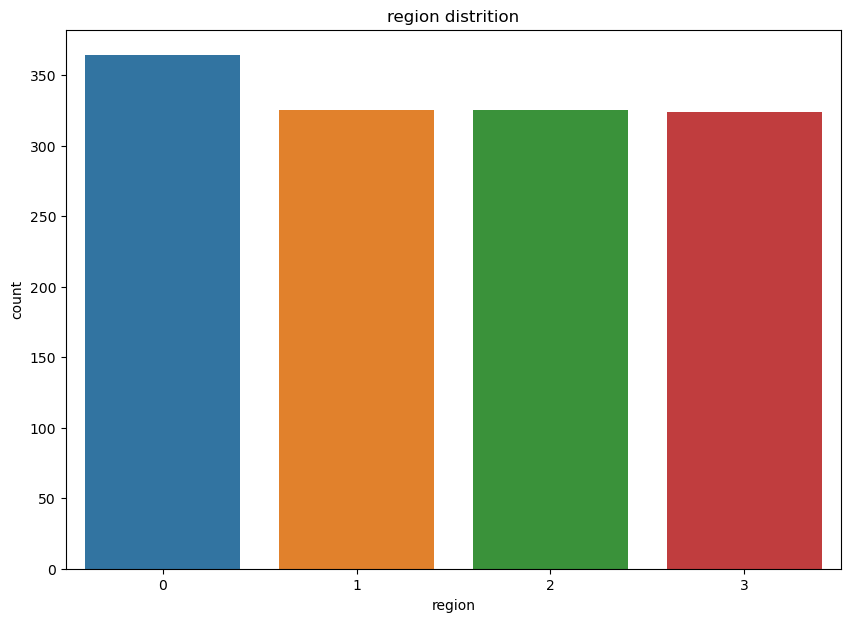

In [104]:
plt.figure(figsize=(10,7))
sns.countplot(x='region',data=file)
plt.title('region distrition')

Text(0.5, 1.0, 'smoker distrition')

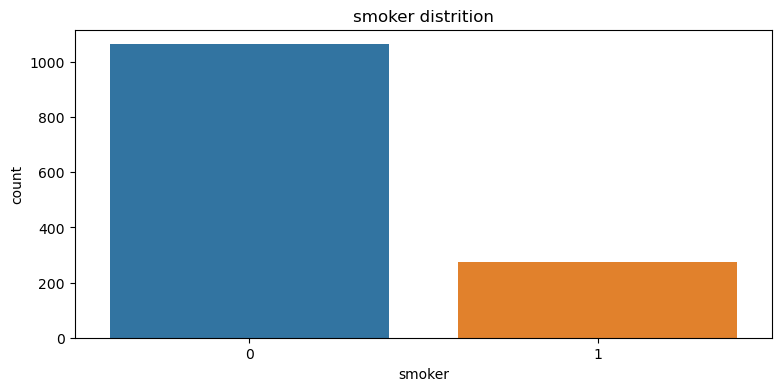

In [105]:
plt.figure(figsize=(9,4))
sns.countplot(x='smoker',data=file)
plt.title('smoker distrition')

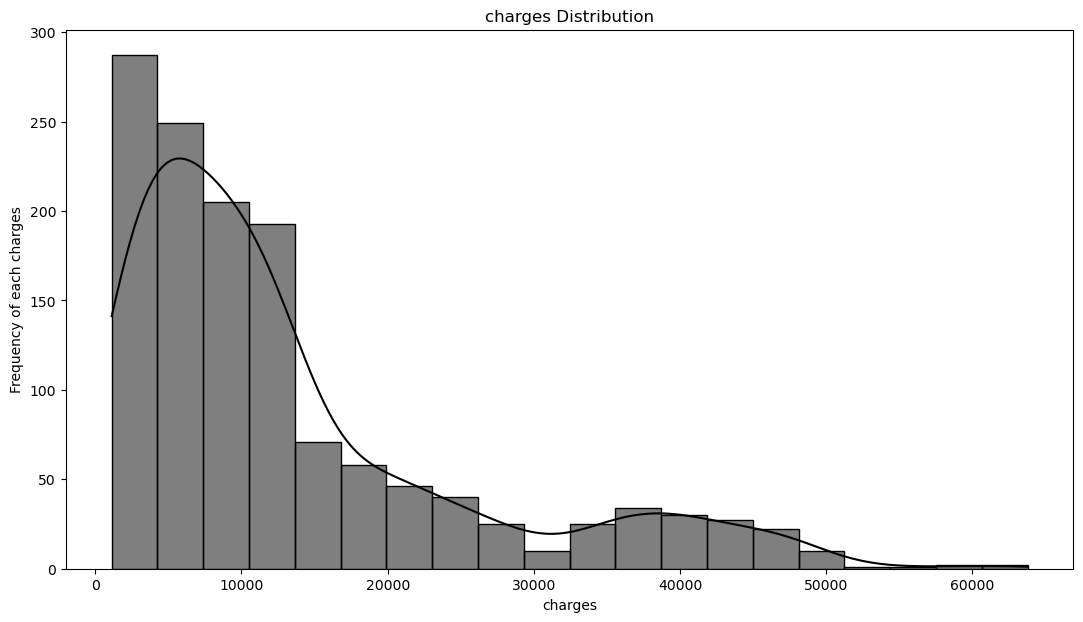

In [106]:
plt.figure(figsize=(13,7))
sns.histplot(file.charges,bins=20,kde=True,color='black')
plt.title('charges Distribution')
plt.xlabel('charges')
plt.ylabel('Frequency of each charges')
plt.show()


In [107]:
#in this graph has gone up to 230
#max people in dataset are paying 1K -13K for their medical inso 
#most for medical exprense are below 20000 with regi

<Figure size 1000x700 with 0 Axes>

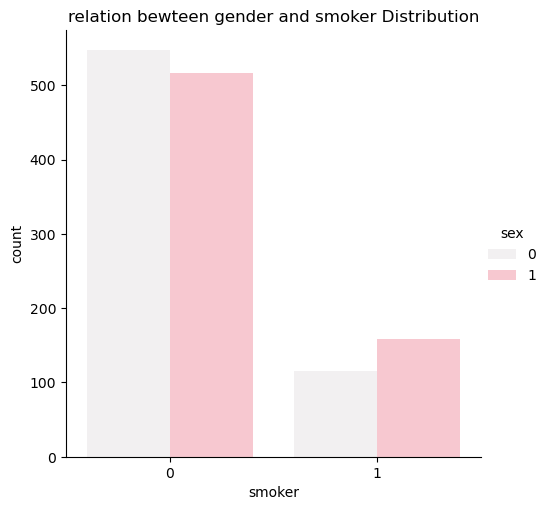

In [108]:
#bi-variable Analysis (QUES -realation between Gender and Smoker )
plt.figure(figsize=(10,7))
sns.catplot(x='smoker',kind='count',hue='sex',color='pink',data=file)
plt.title('relation bewteen gender and smoker Distribution')
plt.xlabel('smoker')
plt.ylabel('count')
plt.show()

hence we can see that we have more number of male smoker rhat female

<Axes: title={'center': 'box ploted for charge for women'}, xlabel='charges', ylabel='smoker'>

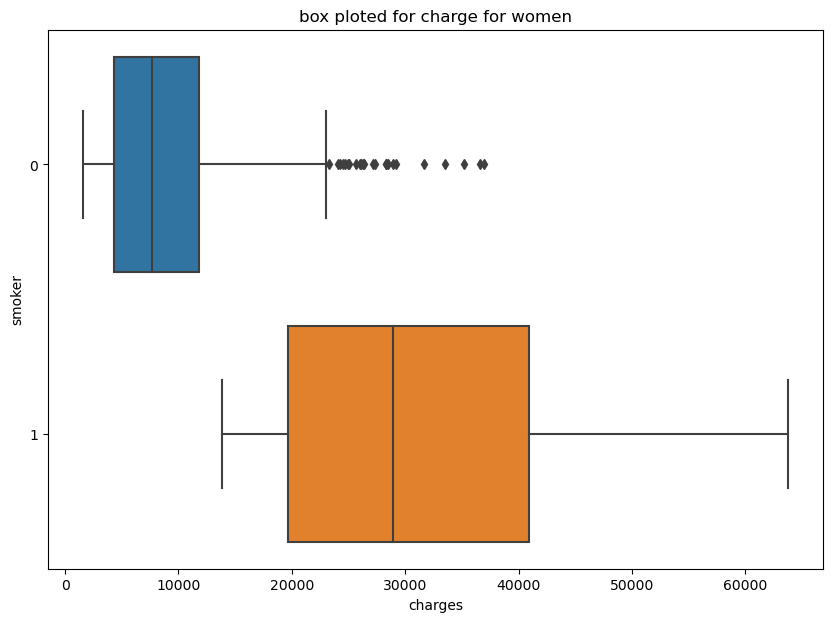

In [109]:
plt.figure(figsize=(10,7))
plt.title('box ploted for charge for women')
sns.boxplot(y='smoker',x='charges',data=file[(file.sex==0)],orient='h')

<Axes: title={'center': 'box ploted for charge for men'}, xlabel='charges', ylabel='smoker'>

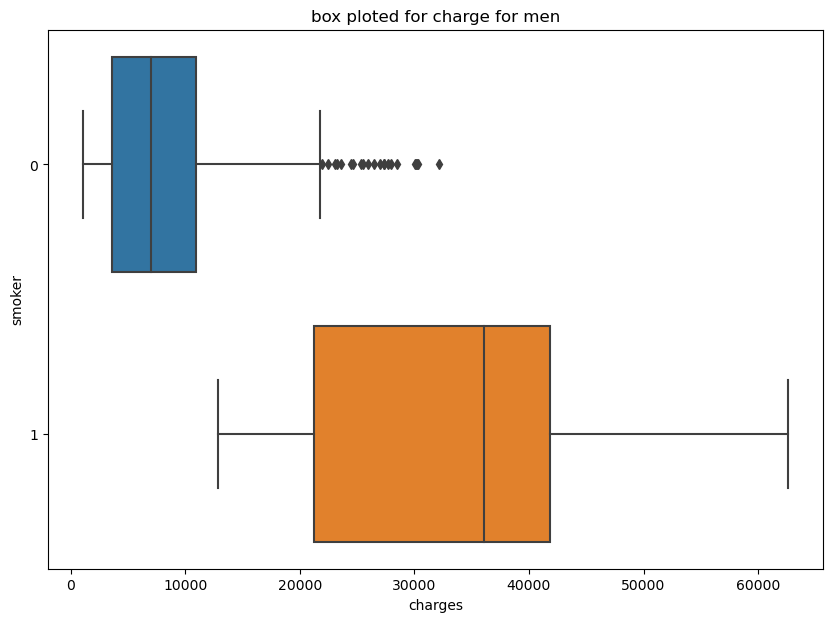

In [110]:
plt.figure(figsize=(10,7))
plt.title('box ploted for charge for men')
sns.boxplot(y='smoker',x='charges',data=file[(file.sex==1)],orient='h')

the prediction is true ,that the medical exprence of male is greater than that of female .In addition to that medical exprenses of smokers is greater than that of non-smoker

in this we see that smokers has more medical expenses so it has a high impact on insurance charge followed by age and bmi whereas region, gender and children has no impact


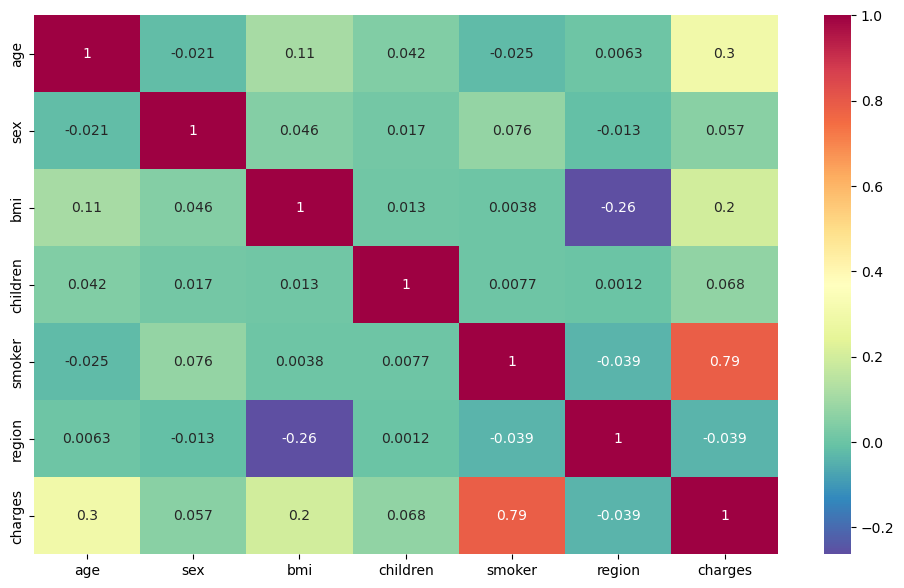

In [111]:
#exploratory data analysis
print("in this we see that smokers has more medical expenses so it has a high impact on insurance charge followed by age and bmi whereas region, gender and children has no impact")
plt.figure(figsize=(12,7))
cor=file.corr()
sns.heatmap(cor,annot=True,cmap='Spectral_r')
plt.show()

in above graph we observe that there is significant number of smokers at the age 19


<Figure size 1300x700 with 0 Axes>

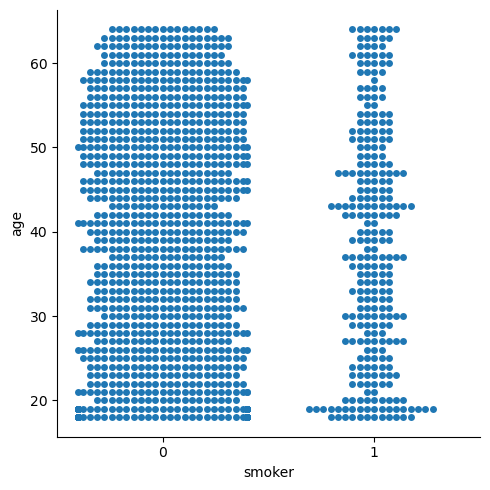

In [112]:
#realtion between smoker and age (SWAM GRAPH)
print("in above graph we observe that there is significant number of smokers at the age 19")
plt.figure(figsize=(13,7))
sns.catplot(x='smoker',y='age',kind="swarm",data=file)

In [113]:
#Multi -variate analysys( when we have two or more variable)

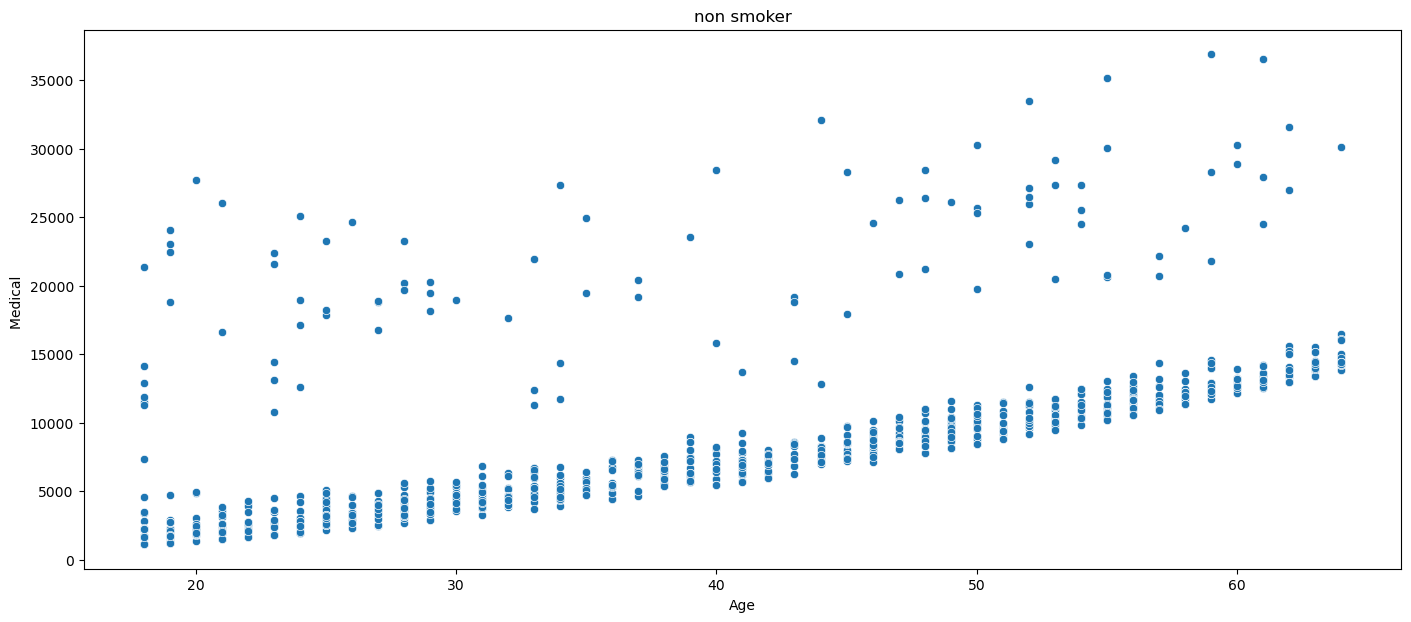

In [114]:
plt.figure(figsize=(17,7))
sns.scatterplot(x='age',y='charges',data=file[(file.smoker==0)])
plt.title('non smoker')
plt.xlabel('Age')
plt.ylabel('Medical ')
plt.show()

Majority of the points should that medical expenses increases with the age which may due to the fact that older people are more prone to illness.But there are someoutliers which shows other illness or expenses which may lead to increase in medical expenses

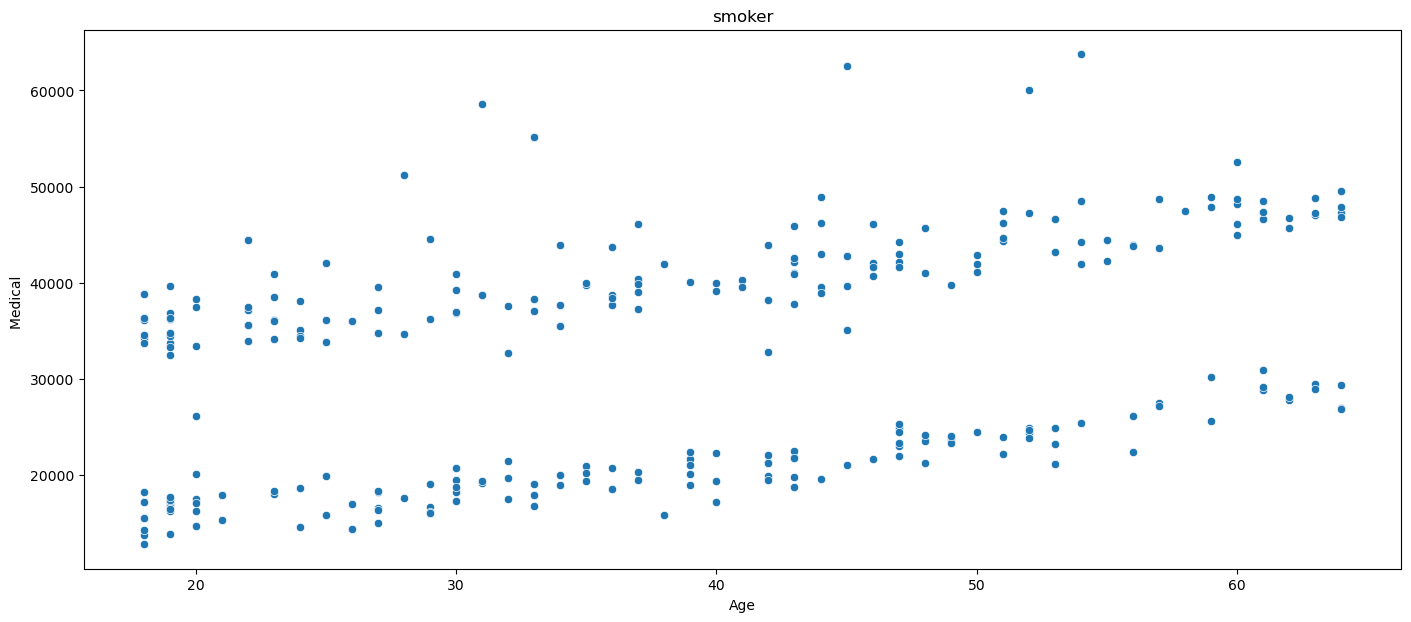

In [115]:
plt.figure(figsize=(17,7))
sns.scatterplot(x='age',y='charges',data=file[(file.smoker==1)])
plt.title('smoker')
plt.xlabel('Age')
plt.ylabel('Medical ')
plt.show()

In this graph there are two segment one with high medical expense which may due to the smoking related illness and other with low medical expense which may due to age related illness.
Now in order to get more clear we can combine both the graphs


<Figure size 1700x700 with 0 Axes>

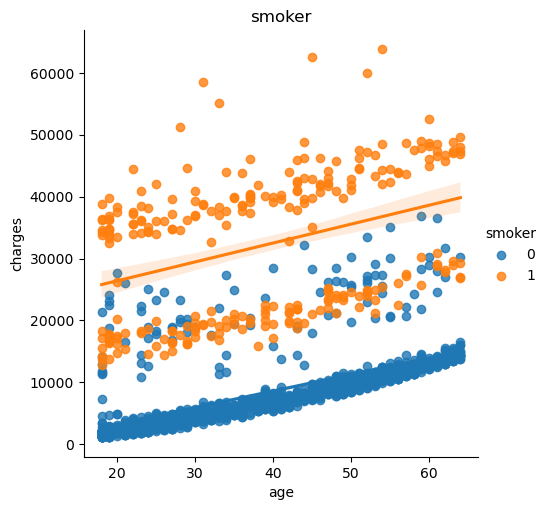

In [116]:
#AGE charges distribution
plt.figure(figsize=(17,7))
sns.lmplot(x='age',y='charges',data=file,hue='smoker')
plt.title('smoker')
plt.show()

Now we can clearly understand the variation in charges with respect to age and smoking habits.The medical exprense of smokers is higher than non smoker irrespective of age.In non -smoker,the cost of treatment increase with age which is kind of obvious

<Figure size 2000x1500 with 0 Axes>

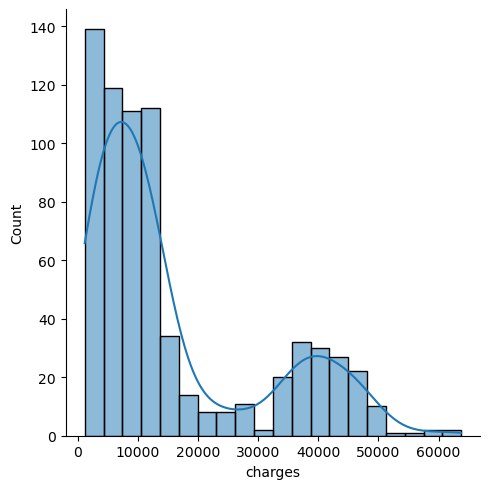

In [117]:
plt.figure(figsize=(20,15))
sns.displot(file[(file.bmi>30)]['charges'],kde=True)
plt.show()

<Figure size 2000x1500 with 0 Axes>

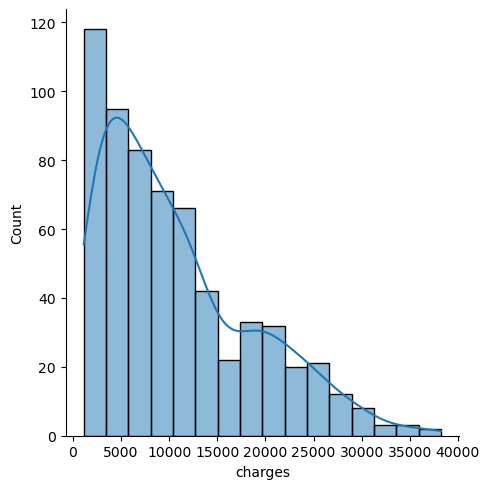

In [118]:
plt.figure(figsize=(20,15))
sns.displot(file[(file.bmi<30)]['charges'],kde=True)
plt.show()

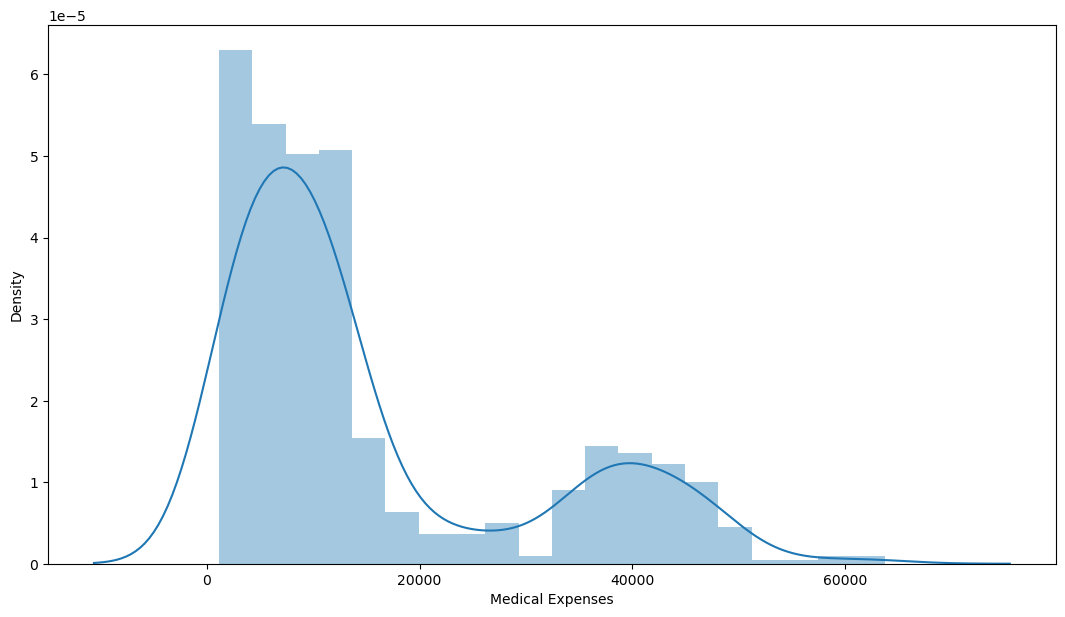

In [119]:
#Relation between BMI and charges for both smoker and non smoker
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(13,7))
sns.distplot(file[(file.bmi>30)]['charges'])
plt.xlabel('Medical Expenses')
plt.show()

therefore.people with BMI less than 30 are spending less where as people with BMI more than 30 are spending more.

In [120]:
#Feature Selection
#Model Buliding and Evaluation
#LIier Regression
import warnings
warnings.filterwarnings('ignore')
x=file.drop('region',axis=1,inplace=True)
y=file.charges


In [121]:
file.head(10)

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
5,31,0,25.740,0,0,3756.62160
6,46,0,33.440,1,0,8240.58960
7,37,0,27.740,3,0,7281.50560
8,37,1,29.830,2,0,6406.41070
9,60,0,25.840,0,0,28923.13692


In [122]:
#Model Building & Evaluation
#Linear Regression
X = file.drop('charges', axis = 1)
y = file.charges

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [124]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1003, 5), (335, 5), (1003,), (335,))

In [125]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [126]:
# Making Prediction
y_pred = reg.predict(X_test)

In [127]:
# Model Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

MAE: 4180.786422973238
RMSE: 6159.554567242219
R2 Score:  0.7486163979240839


In [128]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg

PolynomialFeatures()

In [129]:
# Transforming the feature to higher degree
X_train_poly = poly_reg.fit_transform(X_train)
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X_train_poly, y_train, test_size = 0.2, random_state = 42)

In [130]:
# Train the Model
plr = LinearRegression()
plr.fit(X_train, y_train)

LinearRegression()

In [131]:
# Making Prediction
y_pred_plr = plr.predict(X_test)

In [132]:
# Model Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_plr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred_plr))

MAE: 2968.067586616958
RMSE: 4852.834838876824
R2 Score:  0.7998931111191243


In [134]:
#freaturs selection 
file.drop('region', axis = 1,inplace = True)

KeyError: "['region'] not found in axis"

In [ ]:
##polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
poly_reg

In [ ]:
#transforing the features to trigat degree
x_train_poly=poly_reg.fit_transform(x_train)
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_train_poly,y_train,test_size=0.2,random_state=0)

In [ ]:
# Train the Model
plr = LinearRegression()
plr.fit(X_train, y_train)

In [ ]:
# Making Prediction
y_pred_plr = plr.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_plr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred_plr))
print("Model is able to explain 80")


In [ ]:
#input the values
age = 21
sex = 1
bmi = 46
children = 0
smoker = 0

In [ ]:
#predicting the price using random forest regression
charge = reg.predict([[age, sex, bmi, children, smoker]])
print('The charge of this new patient is $',charge[0])

In [ ]:
#input
age=21
sex=1
bmi=27
children=0
smoker=1

In [ ]:
#predicting the price using random forest regression
charge = reg.predict([[age, sex, bmi, children, smoker]])
print('The charge of this new patient is $',charge[0])
print("We have created End to End Prediction system using Linear Regression Model and our accuracy score comes out to be a 75%. Later, we can use more advanced libraries to make this system more versatile and robust, so that we can deploy it in the market")

In [ ]:
# HEAT MAP
sns.heatmap(cor,annot=True,cmap='Spectral_r')
plt.show()

In [ ]:
#ols MODEL
import statsmodels.api as sm

In [ ]:
#add constant to predictor variable
X=sm.add_constant(X)

In [ ]:
result=sm.OLS(y,X).fit()

In [ ]:
#printing the summary table
result.summary()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [ ]:
#Ridge Regression 
Ridgemodel=Ridge()
Ridgemodel

In [ ]:
#training
Ridgemodel.fit(X_train,y_train)

In [ ]:
r_p=Ridgemodel.predict(X_train)
r2_score(y_train,r_p)

In [ ]:
r_p=Ridgemodel.predict(X_test)
r2_score(y_t,r_p)